In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from numpy import cos, sin
import cmaps
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.font_manager import FontProperties

In [3]:
# 加载保存的npz文件
data = np.load('D:/BR/CGAN-dpi/cloudsat-gan-master/cloudsat-gan-master/winduvcgan_v3/37zheng/ccmpdata/data/scenes_output.npz')

In [4]:
# 获取scene_gen和scene_real数据
scene_gen1 = data['scene_gen']
scene_real1 = data['scene_real']
scene_initial1=data['scene_initial']
print(scene_gen1.shape)

(1314, 64, 64, 2)


In [5]:
print(f"数据形状: scene_initial={scene_initial1.shape}, scene_gen={scene_gen1.shape}, scene_real={scene_real1.shape}")

数据形状: scene_initial=(1314, 64, 64, 2), scene_gen=(1314, 64, 64, 2), scene_real=(1314, 64, 64, 2)


In [6]:
# cmap = cmaps.BlueWhiteOrangeRed
# 设置颜色范围
cmap='RdYlBu_r'
vmin, vmax = -18, 18

In [7]:
time_step = 1020

data_initial_u = scene_initial1[time_step, :, :, 0].copy()  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
data_initial_u[data_initial_u > 35] = np.nan
data_initial_u_phy = data_initial_u.reshape((64, 64))



# initial_data = data_initial_u[time_step, :, :, 0].copy()  # 创建副本
# initial_data[initial_data > 35] = np.nan  # 将大于35的值设为NaN

# v
data_initial_v = scene_initial1[time_step, :, :, 1].copy() # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
data_initial_v[data_initial_v > 35] = np.nan
data_initial_v_phy = data_initial_v.reshape((64, 64))

In [8]:
data_gen_u = scene_gen1[time_step, :, :, 0] # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
data_gen_u_phy = data_gen_u.reshape((64, 64))
# v
data_gen_v = scene_gen1[time_step, :, :, 1]  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
data_gen_v_phy = data_gen_v.reshape((64, 64))

In [9]:
data_real_u = scene_real1[time_step, :, :, 0] # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
data_real_u_phy = data_real_u.reshape((64, 64))
# v
data_real_v = scene_real1[time_step, :, :, 1]  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
data_real_v_phy = data_real_v.reshape((64, 64))

In [10]:
# 假设你的数据维度和范围
lon = np.linspace(155, 171, 64)  # 示例经度范围
lat = np.linspace(31, 15, 64)    # 示例纬度范围
lon, lat = np.meshgrid(lon, lat)  # 创建经纬度的网格

# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
select_data_initial_u_phy = data_initial_u_phy[ :, :]
select_data_initial_v_phy = data_initial_v_phy[ :, :]
wind_speed_initial = np.sqrt(select_data_initial_u_phy**2 + select_data_initial_v_phy**2)

In [11]:
# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
select_data_gen_u_phy = data_gen_u_phy[ :, :]
select_data_gen_v_phy = data_gen_v_phy[ :, :]
wind_speed_phy_gen = np.sqrt(select_data_gen_u_phy**2 + select_data_gen_v_phy**2)

In [12]:
max_speed_index = np.unravel_index(np.argmax(wind_speed_phy_gen), wind_speed_phy_gen.shape)
max_speed_lon = lon[max_speed_index]
max_speed_lat = lat[max_speed_index]
max_speed = wind_speed_phy_gen[max_speed_index]

print(max_speed)
print(max_speed_lon)
print(max_speed_lat)

23.759935
164.3968253968254
22.61904761904762


In [13]:
# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
select_data_real_u_phy = data_real_u_phy[ :, :]
select_data_real_v_phy = data_real_v_phy[ :, :]
wind_speed_real = np.sqrt(select_data_real_u_phy**2 + select_data_real_v_phy**2)

In [14]:
max_speed_index = np.unravel_index(np.argmax(wind_speed_real), wind_speed_real.shape)
max_speed_lon = lon[max_speed_index]
max_speed_lat = lat[max_speed_index]
max_speed = wind_speed_real[max_speed_index]

print(max_speed)
print(max_speed_lon)
print(max_speed_lat)

25.752981
164.14285714285714
23.126984126984127


In [15]:
diff = wind_speed_phy_gen - wind_speed_real
non_zero_mask = diff != 0
squared_diff = (diff ** 2) * non_zero_mask
rmse = np.sum(squared_diff) / np.sum(non_zero_mask)

In [16]:
print(rmse)

0.9343259334564209


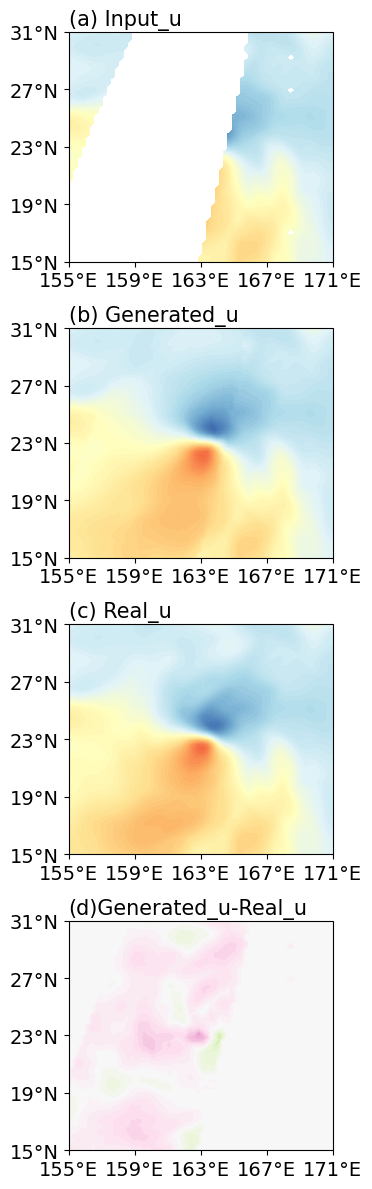

In [86]:
# 创建包含两个子图的图形
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(6, 12), 
                              subplot_kw={'projection': ccrs.PlateCarree()})

# 设置两个子图的显示范围
extent = [155, 170, 15, 30]

# 第一个子图
ax1.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf1 = ax1.contourf(lon, lat, data_initial_u_phy, levels=np.arange(-25, 25.5, 0.5), 
                         vmin=-25, vmax=25,  # 明确设置范围
                        transform=ccrs.PlateCarree(), extend='neither', cmap='RdYlBu_r')
# quiver1 = ax1.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],
#                     transform=ccrs.PlateCarree())
# 设置第一个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax1.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax1.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

plt.xticks(fontsize=18)


ax1.set_aspect(0.87)
# 为第一个子图添加标题
ax1.set_title('(a) Input_u', loc='left', fontsize=15, pad=5)


# 第二个子图
ax2.set_extent(extent, crs=ccrs.PlateCarree())

contourf2 = ax2.contourf(lon, lat, data_gen_u_phy, levels=np.arange(-25, 25, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver2 = ax2.quiver(lon[skip], lat[skip], select_data_gen_u_phy[skip], select_data_gen_v_phy[skip],
#                     transform=ccrs.PlateCarree())
# 使用contour绘制NaN区域的边界
nan_mask = np.isnan(data_initial_u_phy).astype(float)
# if np.any(nan_mask > 0):
#     # 绘制边界线
#     contour_line = ax2.contour(lon, lat, nan_mask, levels=[0.5], 
#                               colors='lightgrey', linewidths=1, linestyles='--',
#                               transform=ccrs.PlateCarree())
    
# 设置第二个子图的网格
ax2.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax2.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.set_aspect(0.87)
# 为第一个子图添加标题
ax2.set_title('(b) Generated_u',loc='left', fontsize=15, pad=5)

# 第三个子图
ax3.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf3 = ax3.contourf(lon, lat, data_real_u_phy, levels=np.arange(-25, 25, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver3 = ax3.quiver(lon[skip], lat[skip], select_data_gen_u_nophy[skip], select_data_gen_v_nophy[skip],
#                     transform=ccrs.PlateCarree())
# if np.any(nan_mask > 0):
#     # 绘制边界线
#     contour_line = ax3.contour(lon, lat, nan_mask, levels=[0.5], 
#                               colors='lightgrey', linewidths=1, linestyles='--',
#                               transform=ccrs.PlateCarree())

# 设置第四个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax3.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax3.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.set_aspect(0.87)
ax3.set_title('(c) Real_u', loc='left',fontsize=15, pad=5)

# 第四个子图
ax4.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf4 = ax4.contourf(lon, lat, data_real_u_phy-data_gen_u_phy,levels=np.arange(-10, 10, 0.5),
                        transform=ccrs.PlateCarree(), extend='neither', cmap='PiYG_r')
# quiver4 = ax4.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
#                     transform=ccrs.PlateCarree())

# 设置第一个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax4.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax4.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.set_aspect(0.87)
ax4.set_title('(d)Generated_u-Real_u', loc='left', fontsize=15, pad=5)

# # 手动设置颜色条位置
# cbar_ax = fig.add_axes([0.15, 0.001, 0.5, 0.005])  # [left, bottom, width, height]
# cbar = fig.colorbar(contourf4, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Surface Wind Speed (m/s)', fontsize=15)

# # 精确设置所有需要的刻度
# ticks = [-8,  -4, 0, 4, 8]
# cbar.set_ticks(ticks)
# cbar.set_ticklabels([f'{tick:.0f}' for tick in ticks])
# cbar.ax.tick_params(labelsize=12)

# 设置两个子图的刻度标签字体大小
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=14)

# 调整子图间距
plt.tight_layout()

# 将保存格式改为PDF
plt.savefig('D:/BR/PID_GAN_PIC/pic6typhoon/typhoon_U-3.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')
# output_dir = 'D:/BR/PID_GAN_PIC/pic6typhoon/'
# os.makedirs(output_dir, exist_ok=True)
# filename = os.path.join(output_dir, f'time_step_u11{time_step:04d}.png')
# plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

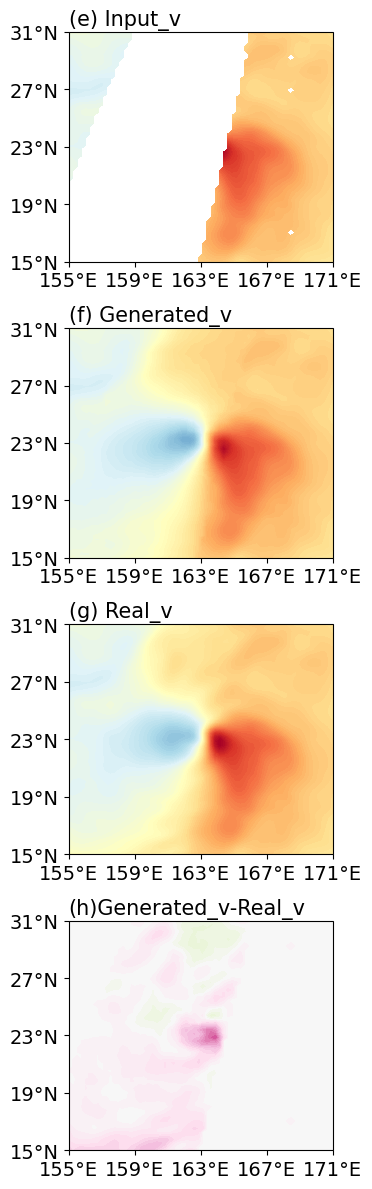

In [87]:
# 创建包含两个子图的图形
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(6, 12), 
                              subplot_kw={'projection': ccrs.PlateCarree()})

# 设置两个子图的显示范围
extent = [155, 170, 15, 30]

# 第一个子图
ax1.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf1 = ax1.contourf(lon, lat, data_initial_v_phy, levels=np.arange(-25, 25, 0.5),
                        transform=ccrs.PlateCarree(), extend='neither', cmap='RdYlBu_r')
# quiver1 = ax1.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],
#                     transform=ccrs.PlateCarree())
# 设置第一个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax1.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax1.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

plt.xticks(fontsize=18)


ax1.set_aspect(0.87)
# 为第一个子图添加标题
ax1.set_title('(e) Input_v', loc='left', fontsize=15, pad=5)


# 第二个子图
ax2.set_extent(extent, crs=ccrs.PlateCarree())

contourf2 = ax2.contourf(lon, lat, data_gen_v_phy, levels=np.arange(-25, 25, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver2 = ax2.quiver(lon[skip], lat[skip], select_data_gen_u_phy[skip], select_data_gen_v_phy[skip],
#                     transform=ccrs.PlateCarree())

# # 使用contour绘制NaN区域的边界
# nan_mask = np.isnan(data_initial_u_phy).astype(float)
# if np.any(nan_mask > 0):
#     # 绘制边界线
#     contour_line = ax2.contour(lon, lat, nan_mask, levels=[0.5], 
#                               colors='lightgrey', linewidths=1, linestyles='--',
#                               transform=ccrs.PlateCarree())
    
# 设置第二个子图的网格
ax2.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax2.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.set_aspect(0.87)
# 为第一个子图添加标题
ax2.set_title('(f) Generated_v',loc='left', fontsize=15, pad=5)

# 第三个子图
ax3.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf3 = ax3.contourf(lon, lat, data_real_v_phy, levels=np.arange(-25, 25, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver3 = ax3.quiver(lon[skip], lat[skip], select_data_gen_u_nophy[skip], select_data_gen_v_nophy[skip],
#                     transform=ccrs.PlateCarree())

# if np.any(nan_mask > 0):
#     # 绘制边界线
#     contour_line = ax3.contour(lon, lat, nan_mask, levels=[0.5], 
#                               colors='lightgrey', linewidths=1, linestyles='--',
#                               transform=ccrs.PlateCarree())
    
# 设置第四个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax3.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax3.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.set_aspect(0.87)
ax3.set_title('(g) Real_v', loc='left',fontsize=15, pad=5)

# 第四个子图
ax4.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf4 = ax4.contourf(lon, lat, data_real_v_phy-data_gen_v_phy,levels=np.arange(-10, 10, 0.5),
                        transform=ccrs.PlateCarree(), extend='neither', cmap='PiYG_r')
# quiver4 = ax4.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
#                     transform=ccrs.PlateCarree())

# 设置第一个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax4.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax4.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.set_aspect(0.87)
ax4.set_title('(h)Generated_v-Real_v', loc='left', fontsize=15, pad=5)

# # 手动设置颜色条位置
# cbar_ax = fig.add_axes([0.15, 0.001, 0.5, 0.005])  # [left, bottom, width, height]
# cbar = fig.colorbar(contourf4, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 设置两个子图的刻度标签字体大小
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=14)

# 调整子图间距
plt.tight_layout()

# 将保存格式改为PDF
plt.savefig('D:/BR/PID_GAN_PIC/pic6typhoon/typhoon_v-3.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# output_dir = 'D:/BR/PID_GAN_PIC/pic6typhoon/'
# os.makedirs(output_dir, exist_ok=True)
# filename = os.path.join(output_dir, f'time_step_u11{time_step:04d}.png')
# plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

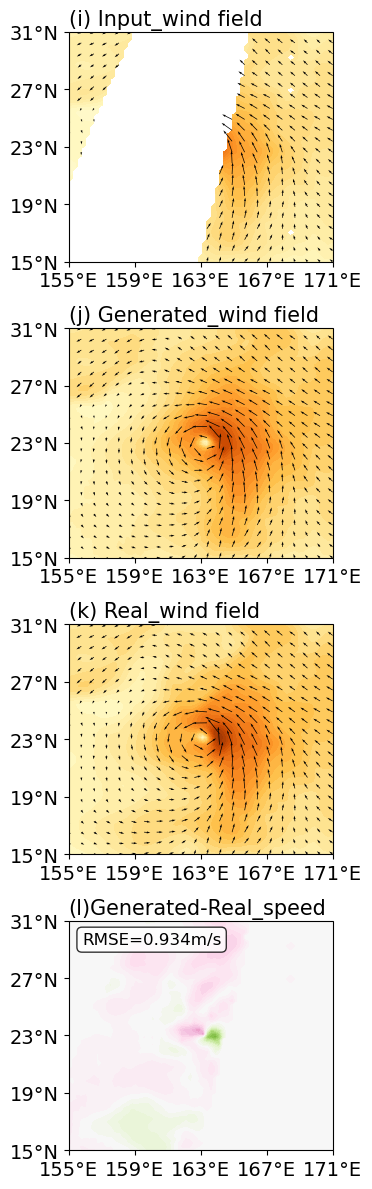

In [19]:
# 创建包含两个子图的图形
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(6, 12), 
                              subplot_kw={'projection': ccrs.PlateCarree()})

# 设置两个子图的显示范围
extent = [155, 170, 15, 30]

# 第一个子图
ax1.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

# contourf1 = ax1.contourf(lon, lat, data_initial_v_phy, levels=np.arange(-25, 25, 0.5),
#                         transform=ccrs.PlateCarree(), extend='neither', cmap='RdYlBu_r')
# # quiver1 = ax1.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],
# #                     transform=ccrs.PlateCarree())

contourf1 = ax1.contourf(lon, lat, wind_speed_initial, levels=np.arange(0, 41, 1),vmin=0,vmax=40,
                        transform=ccrs.PlateCarree(), extend='neither', cmap='YlOrBr')
quiver1 = ax1.quiver(lon[skip], lat[skip], select_data_initial_u_phy[skip], select_data_initial_v_phy[skip],
                    transform=ccrs.PlateCarree())


# 设置第一个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax1.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax1.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

plt.xticks(fontsize=18)


ax1.set_aspect(0.87)
# 为第一个子图添加标题
ax1.set_title('(i) Input_wind field', loc='left', fontsize=15, pad=5)


# 第二个子图
ax2.set_extent(extent, crs=ccrs.PlateCarree())

contourf2 = ax2.contourf(lon, lat, wind_speed_phy_gen, levels=np.arange(0, 31, 1),
                        transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
quiver2 = ax2.quiver(lon[skip], lat[skip], select_data_gen_u_phy[skip], select_data_gen_v_phy[skip],
                    transform=ccrs.PlateCarree())

# # 使用contour绘制NaN区域的边界
# nan_mask = np.isnan(data_initial_u_phy).astype(float)
# if np.any(nan_mask > 0):
#     # 绘制边界线
#     contour_line = ax2.contour(lon, lat, nan_mask, levels=[0.5], 
#                               colors='grey', linewidths=1, linestyles='--',
#                               transform=ccrs.PlateCarree())
    
# 设置第二个子图的网格
ax2.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax2.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.set_aspect(0.87)
# 为第一个子图添加标题
ax2.set_title('(j) Generated_wind field',loc='left', fontsize=15, pad=5)

# 第三个子图
ax3.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf3 = ax3.contourf(lon, lat, wind_speed_real, levels=np.arange(0, 31, 1),
                        transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
quiver3 = ax3.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
                    transform=ccrs.PlateCarree())

# if np.any(nan_mask > 0):
#     # 绘制边界线
#     contour_line = ax3.contour(lon, lat, nan_mask, levels=[0.5], 
#                               colors='grey', linewidths=1, linestyles='--',
#                               transform=ccrs.PlateCarree())
    
# 设置第四个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax3.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax3.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.set_aspect(0.87)
ax3.set_title('(k) Real_wind field', loc='left',fontsize=15, pad=5)

# 第四个子图
ax4.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf4 = ax4.contourf(lon, lat, wind_speed_phy_gen-wind_speed_real,levels=np.arange(-10, 10, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='PiYG_r')
# quiver4 = ax4.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
#                     transform=ccrs.PlateCarree())

# 设置第一个子图的网格
lon_ticks = range(155, 172, 4)
lat_ticks = range(15, 32, 4)
ax4.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax4.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.set_aspect(0.87)
ax4.set_title('(l)Generated-Real_speed', loc='left', fontsize=15, pad=5)

diff = wind_speed_phy_gen - wind_speed_real
non_zero_mask = diff != 0
squared_diff = (diff ** 2) * non_zero_mask
rmse = np.sum(squared_diff) / np.sum(non_zero_mask)

ax4.text(0.05, 0.95, f'RMSE={rmse:.3f}m/s', transform=ax4.transAxes, 
         fontsize=12, verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# # 手动设置颜色条位置
# cbar_ax = fig.add_axes([0.15, 0.001, 0.5, 0.005])  # [left, bottom, width, height]
# cbar = fig.colorbar(contourf1, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# # 精确设置所有需要的刻度
# ticks = [0,  8, 16, 24, 32, 40]
# cbar.set_ticks(ticks)
# cbar.set_ticklabels([f'{tick:.0f}' for tick in ticks])
# cbar.ax.tick_params(labelsize=12)

# 设置两个子图的刻度标签字体大小




for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=14)

# 调整子图间距
plt.tight_layout()

# 将保存格式改为PDF
plt.savefig('D:/BR/PID_GAN_PIC/pic6typhoon/typhoon_wind-4.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# output_dir = 'D:/BR/PID_GAN_PIC/pic6typhoon/'
# os.makedirs(output_dir, exist_ok=True)
# filename = os.path.join(output_dir, f'time_step_u11{time_step:04d}.png')
# plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_31164\3994171880.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


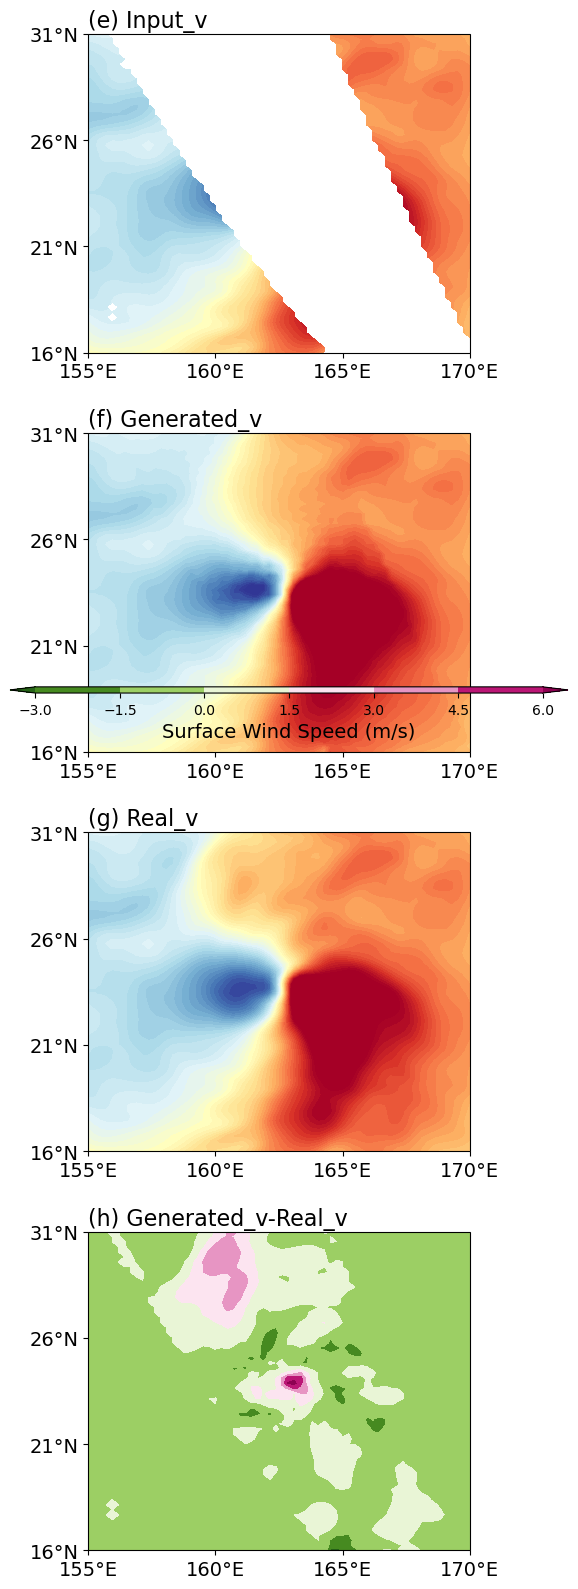

In [24]:
# 创建包含两个子图的图形
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(8, 16), 
                              subplot_kw={'projection': ccrs.PlateCarree()})

# 设置两个子图的显示范围
extent = [155, 170, 16, 31]

# 第一个子图
ax1.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf1 = ax1.contourf(lon, lat, data_initial_v_phy, levels=np.arange(-13, 13, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver1 = ax1.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],
#                     transform=ccrs.PlateCarree())
# 设置第一个子图的网格
lon_ticks = range(155, 171, 5)
lat_ticks = range(16, 32, 5)
ax1.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax1.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_aspect(0.835)
# 为第一个子图添加标题
ax1.set_title('(e) Input_v', loc='left', fontsize=16, pad=5)

# 第二个子图
ax2.set_extent(extent, crs=ccrs.PlateCarree())

contourf2 = ax2.contourf(lon, lat, data_gen_v_phy, levels=np.arange(-13, 13, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver2 = ax2.quiver(lon[skip], lat[skip], select_data_gen_u_phy[skip], select_data_gen_v_phy[skip],
#                     transform=ccrs.PlateCarree())
# 设置第二个子图的网格
ax2.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax2.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.set_aspect(0.835)
# 为第一个子图添加标题
ax2.set_title('(f) Generated_v',loc='left', fontsize=16, pad=5)

# 第三个子图
ax3.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf3 = ax3.contourf(lon, lat, data_real_v_phy, levels=np.arange(-13, 13, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='RdYlBu_r')
# quiver3 = ax3.quiver(lon[skip], lat[skip], select_data_gen_u_nophy[skip], select_data_gen_v_nophy[skip],
#                     transform=ccrs.PlateCarree())
# 设置第四个子图的网格
lon_ticks = range(155, 171, 5)
lat_ticks = range(16, 32, 5)
ax3.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax3.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.set_aspect(0.835)
ax3.set_title('(g) Real_v', loc='left',fontsize=16, pad=5)

# 第四个子图
ax4.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf4 = ax4.contourf(lon, lat, data_real_v_phy-data_gen_v_phy, 
                        transform=ccrs.PlateCarree(), extend='both', cmap='PiYG_r')
# quiver4 = ax4.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
#                     transform=ccrs.PlateCarree())

# 设置第一个子图的网格
lon_ticks = range(155, 171, 5)
lat_ticks = range(16, 32, 5)
ax4.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax4.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.set_aspect(0.835)
ax4.set_title('(h) Generated_v-Real_v', loc='left', fontsize=16, pad=5)

# 添加颜色条（共享一个颜色条）
cbar = fig.colorbar(contourf4, ax=[ax1, ax2], orientation='horizontal', 
                   pad=0.07, shrink=0.9, aspect=90)
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 设置两个子图的刻度标签字体大小
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=14)

# 调整子图间距
plt.tight_layout()

output_dir = 'D:/BR/PID_GAN_PIC/pic6typhoon/'
os.makedirs(output_dir, exist_ok=True)
filename = os.path.join(output_dir, f'time_step_v{time_step:04d}.png')
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

0.9258928981539174


C:\Users\dell\AppData\Local\Temp\ipykernel_31164\3729448864.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


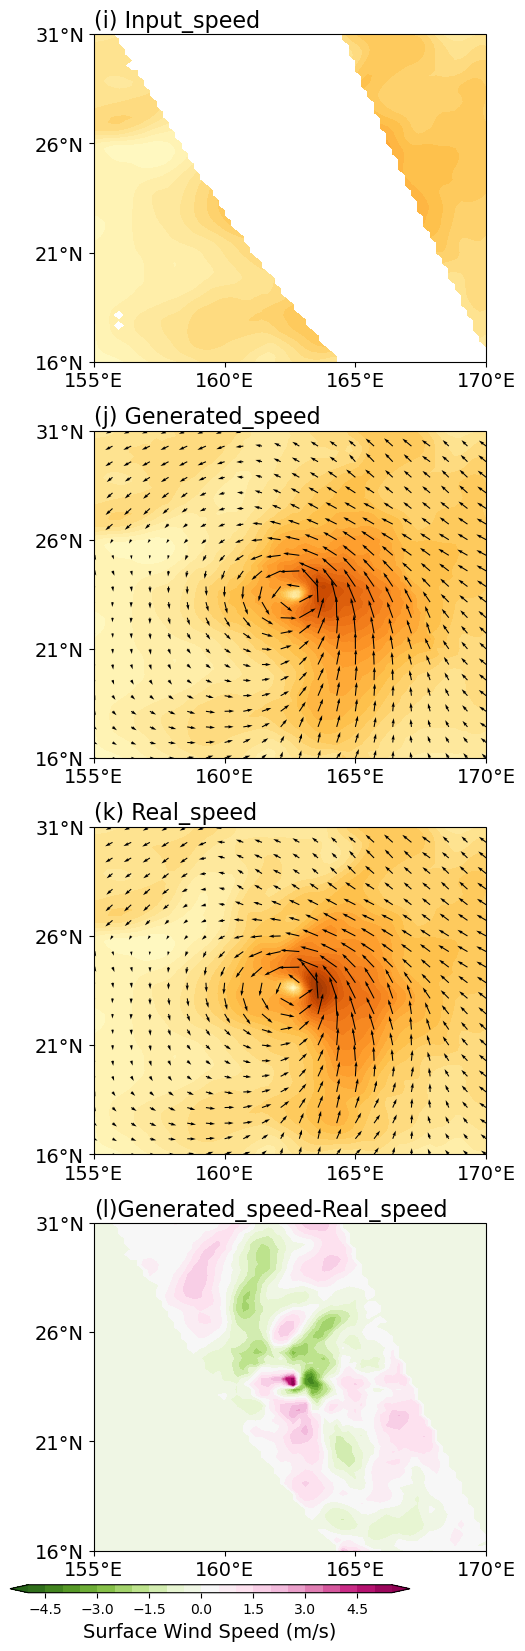

In [23]:
# 创建包含两个子图的图形
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 16), 
                              subplot_kw={'projection': ccrs.PlateCarree()})

# 设置两个子图的显示范围
extent = [155, 170, 16, 31]

# 第一个子图
ax1.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf1 = ax1.contourf(lon, lat, wind_speed_initial, levels=np.arange(0, 31, 1),
                        transform=ccrs.PlateCarree(), extend='neither', cmap='YlOrBr')
# quiver1 = ax1.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],
#                     transform=ccrs.PlateCarree())
# 设置第一个子图的网格
lon_ticks = range(155, 171, 5)
lat_ticks = range(16, 32, 5)
ax1.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax1.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_aspect(0.835)
# 为第一个子图添加标题
ax1.set_title('(i) Input_speed', loc='left',fontsize=16, pad=5)

# 第二个子图
ax2.set_extent(extent, crs=ccrs.PlateCarree())

contourf2 = ax2.contourf(lon, lat, wind_speed_phy_gen, levels=np.arange(0, 31, 1),
                        transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
quiver2 = ax2.quiver(lon[skip], lat[skip], select_data_gen_u_phy[skip], select_data_gen_v_phy[skip],
                    transform=ccrs.PlateCarree())
# 设置第二个子图的网格
ax2.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax2.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.set_aspect(0.835)
# 为第一个子图添加标题
ax2.set_title('(j) Generated_speed',loc='left', fontsize=16, pad=5)

# 第三个子图
ax3.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf3 = ax3.contourf(lon, lat, wind_speed_real, levels=np.arange(0, 31, 1),
                        transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
quiver3 = ax3.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
                    transform=ccrs.PlateCarree())
# 设置第四个子图的网格
lon_ticks = range(155, 171, 5)
lat_ticks = range(16, 32, 5)
ax3.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax3.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.set_aspect(0.835)
ax3.set_title('(k) Real_speed',loc='left', fontsize=16, pad=5)

# 第四个子图
ax4.set_extent(extent, crs=ccrs.PlateCarree())
skip = (slice(None, None, 3), slice(None, None, 3))

contourf4 = ax4.contourf(lon, lat, wind_speed_phy_gen-wind_speed_real,levels=np.arange(-5, 6, 0.5),
                        transform=ccrs.PlateCarree(), extend='both', cmap='PiYG_r')
# quiver4 = ax4.quiver(lon[skip], lat[skip], select_data_real_u_phy[skip], select_data_real_v_phy[skip],
#                     transform=ccrs.PlateCarree())

diff = wind_speed_phy_gen-wind_speed_real
non_zero_mask = diff != 0
squared_diff = (diff ** 2) * non_zero_mask
rmse = np.sum(squared_diff) / np.sum(non_zero_mask)
print(rmse)

# 设置第一个子图的网格
lon_ticks = range(155, 171, 5)
lat_ticks = range(16, 32, 5)
ax4.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax4.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.set_aspect(0.835)
ax4.set_title('(l)Generated_speed-Real_speed', loc='left',fontsize=16, pad=5)

# 手动设置颜色条位置
cbar_ax = fig.add_axes([0.15, 0.001, 0.5, 0.005])  # [left, bottom, width, height]
cbar = fig.colorbar(contourf4, cax=cbar_ax, orientation='horizontal',extend='neither')
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# # 添加颜色条（共享一个颜色条）
# cbar = fig.colorbar(contourf4, ax=[ax1, ax2], orientation='horizontal', 
#                    pad=0.07, shrink=0.9, aspect=90)
# cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 设置两个子图的刻度标签字体大小
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=14)

# 调整子图间距
plt.tight_layout()

output_dir = 'D:/BR/PID_GAN_PIC/pic6typhoon/'
os.makedirs(output_dir, exist_ok=True)
filename = os.path.join(output_dir, f'time_step_111{time_step:04d}.png')
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 选择要显示的8个时间步
time_steps = [49,582,593,600, 609, 1006, 1153, 1161]

# 创建图形 - 调整高度使其更紧凑
fig, axes = plt.subplots(3, 8, figsize=(18.5,4))  # 减小高度

# 设置紧凑的布局 - 重点调整wspace
plt.subplots_adjust(wspace=0.23, hspace=0.18)  # wspace从0.3减小到0.1

# 设置每个子图的长宽比例
aspect_ratio = 0.6

# 设置整数刻度
xtick_positions = [0, 15, 31, 47, 63]
xtick_labels = ['155°', '159°', '163°', '167°', '171°E']
ytick_positions = [0, 15, 31, 47, 63]
ytick_labels = ['31°N', '27°N', '23°N', '19°N', '15°N']

# 循环绘制每个时间步
for i, time_step in enumerate(time_steps):
    # 绘制scene_initial
#     im0 = axes[0, i].imshow(scene_initial[time_step, :, :, 0], cmap=cmap, vmin=vmin, vmax=vmax, aspect=aspect_ratio)
    # 处理initial数据：将大于35的值设置为NaN（空白区域）
    initial_data = scene_initial[time_step, :, :, 1].copy()  # 创建副本
    initial_data[initial_data > 35] = np.nan  # 将大于35的值设为NaN
    
    # 绘制scene_initial（使用处理后的数据）
    im0 = axes[0, i].imshow(initial_data, cmap=cmap, vmin=vmin, vmax=vmax, aspect=aspect_ratio)
    
    # 绘制scene_gen
    im1 = axes[1, i].imshow(scene_gen[time_step, :, :, 1], cmap=cmap, vmin=vmin, vmax=vmax, aspect=aspect_ratio)
    
    # 绘制scene_real
    im2 = axes[2, i].imshow(scene_real[time_step, :, :, 1], cmap=cmap, vmin=vmin, vmax=vmax, aspect=aspect_ratio)
    
    axes[2, i].set_xlabel(f'Longitude', fontsize=12)  # 减小x轴标签字体
    
    # 只在第一列设置y轴标签
    if i == 0:
        axes[0, i].set_ylabel('Input\nLatitude', fontsize=12, labelpad=5)
        axes[1, i].set_ylabel('Generated\nLatitude', fontsize=12, labelpad=5)
        axes[2, i].set_ylabel('Real\nLatitude', fontsize=12, labelpad=5)
        axes[0, i].set_yticks(ytick_positions)
        axes[0, i].set_yticklabels(ytick_labels, fontsize=10)
        axes[1, i].set_yticks(ytick_positions)
        axes[1, i].set_yticklabels(ytick_labels, fontsize=10)
        axes[2, i].set_yticks(ytick_positions)
        axes[2, i].set_yticklabels(ytick_labels, fontsize=10)
    else:
        axes[0, i].set_yticks([])
        axes[1, i].set_yticks([])
        axes[2, i].set_yticks([])
    
    # 设置x轴刻度（所有子图都设置，但只显示最后一行）
    axes[0, i].set_xticks(xtick_positions)
    axes[0, i].set_xticklabels([])  # 不显示标签
    axes[1, i].set_xticks(xtick_positions)
    axes[1, i].set_xticklabels([])  # 不显示标签
    axes[2, i].set_xticks(xtick_positions)
    axes[2, i].set_xticklabels(xtick_labels, fontsize=10)  # 只在最后一行显示标签

# 添加单个颜色条（更紧凑）
cbar_ax = fig.add_axes([0.92, 0.15, 0.008, 0.7])  # 更窄的颜色条
cbar = fig.colorbar(im0, cax=cbar_ax)
cbar.set_label('Wind Speed (m/s)', fontsize=12)
cbar.ax.tick_params(labelsize=12)

# plt.tight_layout(rect=[0, 0, 0.9, 1])
# plt.savefig('E:/PID_GAN/PID-PIC_1/restruct_v',bbox_inches='tight')
plt.show()